Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

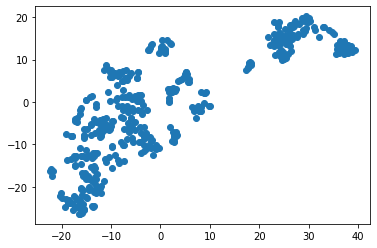

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
boston = load_boston()
target = boston.target
y = pd.DataFrame(target, columns=["price"])
X = pd.DataFrame(boston.data, columns=boston.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

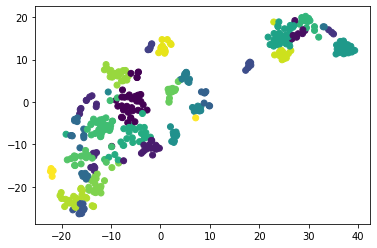

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [8]:
labels_train = kmeans.fit_predict(X_train_tsne)
labels_train
# plt.scatter(labels_train[:, 0], labels_train[:, 1], c=labels_train)
# plt.show()

array([2, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1,
       0, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 2, 2, 1, 0, 2, 0, 2, 1,
       2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       2, 1, 0, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0,
       0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1,
       1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1,
       2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0,
       1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 2,
       2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1,
       1, 2, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1,
       2, 1, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0,

* Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
